# 所有公式输入接受Latex格式,所有字符串均为RawString.防止和字符串中的转义字符冲突


# 求极限

sympy不支持按步骤化简分步输出功能,请自行化简

In [75]:
from sympy import symbols, limit, oo, pprint
from sympy.parsing.latex import parse_latex

x = symbols('x')
formula = r"\ln{(2+3^{-x})}"
f = parse_latex(formula)
print("source formula: ")
display(f)

try:
    # 计算并显示 x 趋近于 正无穷 的极限
    lim_inf = limit(f, x, oo)
    print("当 x 趋近于 正无穷，函数的极限为: ")
    display(lim_inf)
except Exception as e:
    display("在计算极限时发生错误: 当 x 趋近于 正无穷，函数的极限为: ", e)

try:
    # 计算并显示 x 趋近于 负无穷 的极限
    lim_ninf = limit(f, x, -oo)
    print("当 x 趋近于 负无穷，函数的极限为: ")
    display(lim_ninf)
except Exception as e:
    display("在计算极限时发生错误: 当 x 趋近于 负无穷，函数的极限为: ", e)

try:
    # 计算并显示 x 趋近于 0 的极限
    lim_0_plus = limit(f, x, 0)
    print("当 x 侧趋近于 0，函数的极限为: ")
    display(lim_0_plus)
except Exception as e:
    display("在计算极限时发生错误: 当 x 趋近于 0，函数的极限为: ", e)
    
    
try:
    # 计算并显示 x 趋近于 0 的右极限
    lim_0_plus = limit(f, x, 0, '+')
    print("当 x 从右侧趋近于 0，函数的极限为: ")
    display(lim_0_plus)
except Exception as e:
    display("在计算极限时发生错误: 当 x 从右侧趋近于 0，函数的极限为: ", e)
    
try:
    # 计算并显示 x 趋近于 0 的左极限
    lim_0_minus = limit(f, x, 0, '-')
    print("当 x 从左侧趋近于 0，函数的极限为: ")
    display(lim_0_minus)
except Exception as e:
    display("在计算极限时发生错误: 当 x 从左侧趋近于 0，函数的极限为: ", e)

source formula: 


当 x 趋近于 正无穷，函数的极限为: 


当 x 趋近于 负无穷，函数的极限为: 


当 x 侧趋近于 0，函数的极限为: 


当 x 从右侧趋近于 0，函数的极限为: 


当 x 从左侧趋近于 0，函数的极限为: 


# 不定积分
定积分请手动添加传入参数

被积函数: 


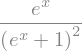

result: 


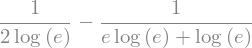

In [27]:
from sympy import symbols, integrate, pprint
from sympy.parsing.latex import parse_latex

x = symbols('x')
formula = r"\frac{e^x}{(e^x + 1)^2}"
f = parse_latex(formula)

# 显示被积函数
print("被积函数: ")
display(f)

# 计算并显示不定积分
definite_integral = integrate(f, (x, 0, 1))
print("result: ")
display(definite_integral)

# 求导案例

Source function: 


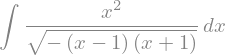

Derivative: 
Iteration 1:


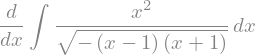

Derivative after simplification:


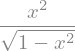

Iteration 2:


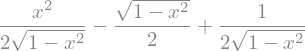

Derivative after simplification:


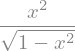

Derivative has not changed, stopping.


In [67]:
from sympy import symbols, Derivative, init_printing
from sympy.parsing.latex import parse_latex
from IPython.display import display

# 启用美化打印
init_printing(use_unicode=True)

x = symbols('x')

# LaTeX 公式字符串
#  添加RawString 防止和字符串中的转义字符冲突
formula = r"\int \frac{x^{2}}{\sqrt{- \left(x - 1\right) \left(x + 1\right)}}\, dx"

# 使用 parse_latex 函数将 LaTeX 公式转换为 SymPy 表达式
f = parse_latex(formula)
print("Source function: ")
display(f)

# 求导
derivative = Derivative(f, x, 1)

print("Derivative: ")

# 设置最大迭代次数
max_iterations = 100

# 一步一步地计算导数
previous_derivative = None
for i in range(max_iterations):
    print(f"Iteration {i+1}:")
    display(derivative)
    derivative = derivative.doit()
    print("Derivative after simplification:")
    display(derivative.simplify())
    # 如果导数与前一次的结果相同，就停止循环
    if derivative == previous_derivative:
        print("Derivative has not changed, stopping.")
        break
    previous_derivative = derivative

# 化简
如果输入和输出相同代表无结果,已经化简到最简,理论上不会显示结果，但是如果输入和输出不同，代表有结果，但是sympy无法化简到最简,这个bug暂时无法修复

# Note

SymPy 的求导操作通常遵循标准的微积分规则，并不会主动进行 "+1-1" 这样的操作来"凑整数"，在微积分中，"+1-1" 的操作通常用于简化表达式或进行特定的代数操作，如完成平方。因此，SymPy 不会主动进行这种操作，反而有可能会死算。这个也许算是符号计算的一个缺点，但也是符号计算和数值计算的一个区别。如果需要这种操作，可以使用 simplify 函数，它会尝试进行各种代数操作，包括 "+1-1" 这样的操作,但是遗憾的是它并不可以分步化简,它使用了好像也看不出,所以好像只能一次性出结果...
这个也算是一种特性???

也许可以添加自定义化简规则??
    但是好像破坏了开箱即用的初衷?....

In [76]:
import dis
from sympy import symbols, Derivative, init_printing,simplify, expand, factor, collect, cancel, apart
from sympy.parsing.latex import parse_latex
from IPython.display import display
from sympy import latex

x = symbols('x')

# 为了方便导出，添加输出为Latex格式
def display_simplified(expr, should_display):
    simplified_expr = simplify(expr)
    if should_display:
        display(simplified_expr)

# 公式
formula = r"x^{2} + (+1 -1)"
f = parse_latex(formula)
print("Source function: ")
display(f)

# 是否输出Latex格式的字符串
logable = True

last_f = f

# 使用 simplify 函数化简表达式
try:
    simplified_f = simplify(f)
    if simplified_f != last_f:
        print("Simplified function: 使用 simplify 函数化简表达式\n")
        display(simplified_f)
        display_simplified(simplified_f,logable )
    last_f = simplified_f
except Exception as e:
    print("Simplified function: 使用 simplify 函数化简表达式\n")
    print("在化简表达式时发生错误: \n", e)
    
# 使用 expand 函数展开表达式
try:
    expanded_f = expand(f)
    if expanded_f != last_f:
        print("Expanded function: 使用 expand 函数展开表达式\n")
        display(expanded_f)
        display_simplified(expanded_f,logable )
    last_f = expanded_f
except Exception as e:
    print("Expanded function: 使用 expand 函数展开表达式\n")
    print("在展开表达式时发生错误: \n", e)
    
# 使用 factor 函数因式分解表达式
try:
    factored_f = factor(f)
    if factored_f != last_f:
        print("Factored function: 使用 factor 函数因式分解表达式\n")
        display(factored_f)
        # 输出Latex公式
        latex_string = latex(factored_f)
        print(latex_string)
        display_simplified(factored_f,logable )
    last_f = factored_f
except Exception as e:
    print("Factored function: 使用 factor 函数因式分解表达式\n")
    print("在因式分解表达式时发生错误: \n", e)

# 使用 collect 函数收集表达式的项
try:
    collected_f = collect(f, x)
    if collected_f != last_f:
        print("Collected function: 使用 collect 函数收集表达式的项\n")
        display(collected_f)
        display_simplified(collected_f,logable )
    last_f = collected_f
except Exception as e:
    print("Collected function: 使用 collect 函数收集表达式的项\n")
    print("在收集表达式的项时发生错误: \n", e)
    
# 使用 cancel 函数化简表达式的分子和分母
try:
    cancelled_f = cancel(f)
    if cancelled_f != last_f:
        print("Cancelled function: 使用 cancel 函数化简表达式的分子和分母\n")
        display(cancelled_f)
        display_simplified(cancelled_f,logable )
    last_f = cancelled_f
except Exception as e:
    print("Cancelled function: 使用 cancel 函数化简表达式的分子和分母\n")
    print("在化简表达式的分子和分母时发生错误: \n", e)

# 使用 apart 函数进行部分分式分解
try:
    aparted_f = apart(f)
    if aparted_f != last_f:
        print("Aparted function: 使用 apart 函数进行部分分式分解\n")
        display(aparted_f)
        display_simplified(aparted_f,logable )
    last_f = aparted_f
except Exception as e:
    print("Aparted function: 使用 apart 函数进行部分分式分解\n")
    print("在进行部分分式分解时发生错误: \n", e)


Source function: 


Simplified function: 使用 simplify 函数化简表达式



Expanded function: 使用 expand 函数展开表达式



Factored function: 使用 factor 函数因式分解表达式



x^{2}


# todo
    添加自定义化简规则...
    线性代数相关...